In [60]:
import numpy as np 
import pandas as pd
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
!pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/385.2 MB 2.3 MB/s eta 0:02:50
   ---------------------------------------- 0.3/385.2 MB 2.7 MB/s eta 0:02:23
   ---------------------------------------- 0.6/385.2 MB 3.6 MB/s eta 0:01:48
   ---------------------------------------- 1.0/385.2 MB 5.0 MB/s eta 0:01:17
   ---------------------------------------- 1.2/385.2 MB 5.5 MB/s eta 0:01:11
   ---------------------------------------- 1.9/385.2 MB 6.3 MB/s eta 0:01:01
   ---------------------------------------- 2.0/385.2 MB 6.6 MB/s eta 0:00:58
   ---------------------------------------- 2.4/385.2 MB 6.3 MB/s eta 0:01:01
   ---------------------------------------- 2.6/385.2 MB 6.2 MB/s eta 0:0

In [59]:
 !pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)


In [61]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [62]:
import pandas as pd
df = pd.read_csv(r"E:\SELF PROJECTS\archive\flight_dataset.csv")
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [64]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
cat_cols = []
for col in df.columns:
    if df[col].dtypes == "object":
        cat_cols.append(col)
cat_cols

['Airline', 'Source', 'Destination']

In [66]:
for col in cat_cols:
    print(f"{col} data has :", df[col].nunique(), "numbers.")
    print(df[col].value_counts(), "\n")

Airline data has : 12 numbers.
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64 

Source data has : 5 numbers.
Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64 

Destination data has : 6 numbers.
Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64 



In [67]:
df["Duration"] = df["Duration_hours"] * 60 + df["Duration_min"]
df.drop(["Duration_hours", "Duration_min"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285


In [68]:
df1 = df.copy()
df.drop("Price", axis = 1, inplace = True)
df = pd.concat([df, df1["Price"]], axis = 1)
df.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration,Price
0,IndiGo,Banglore,New Delhi,0,24,3,2019,22,20,1,10,170,3897
1,Air India,Kolkata,Banglore,2,1,5,2019,5,50,13,15,445,7662
2,Jet Airways,Delhi,Cochin,2,9,6,2019,9,25,4,25,1140,13882
3,IndiGo,Kolkata,Banglore,1,12,5,2019,18,5,23,30,325,6218
4,IndiGo,Banglore,New Delhi,1,1,3,2019,16,50,21,35,285,13302


In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration,Price
0,3,0,5,0,24,3,2019,22,20,1,10,170,3897
1,1,3,0,2,1,5,2019,5,50,13,15,445,7662
2,4,2,1,2,9,6,2019,9,25,4,25,1140,13882
3,3,3,0,1,12,5,2019,18,5,23,30,325,6218
4,3,0,5,1,1,3,2019,16,50,21,35,285,13302


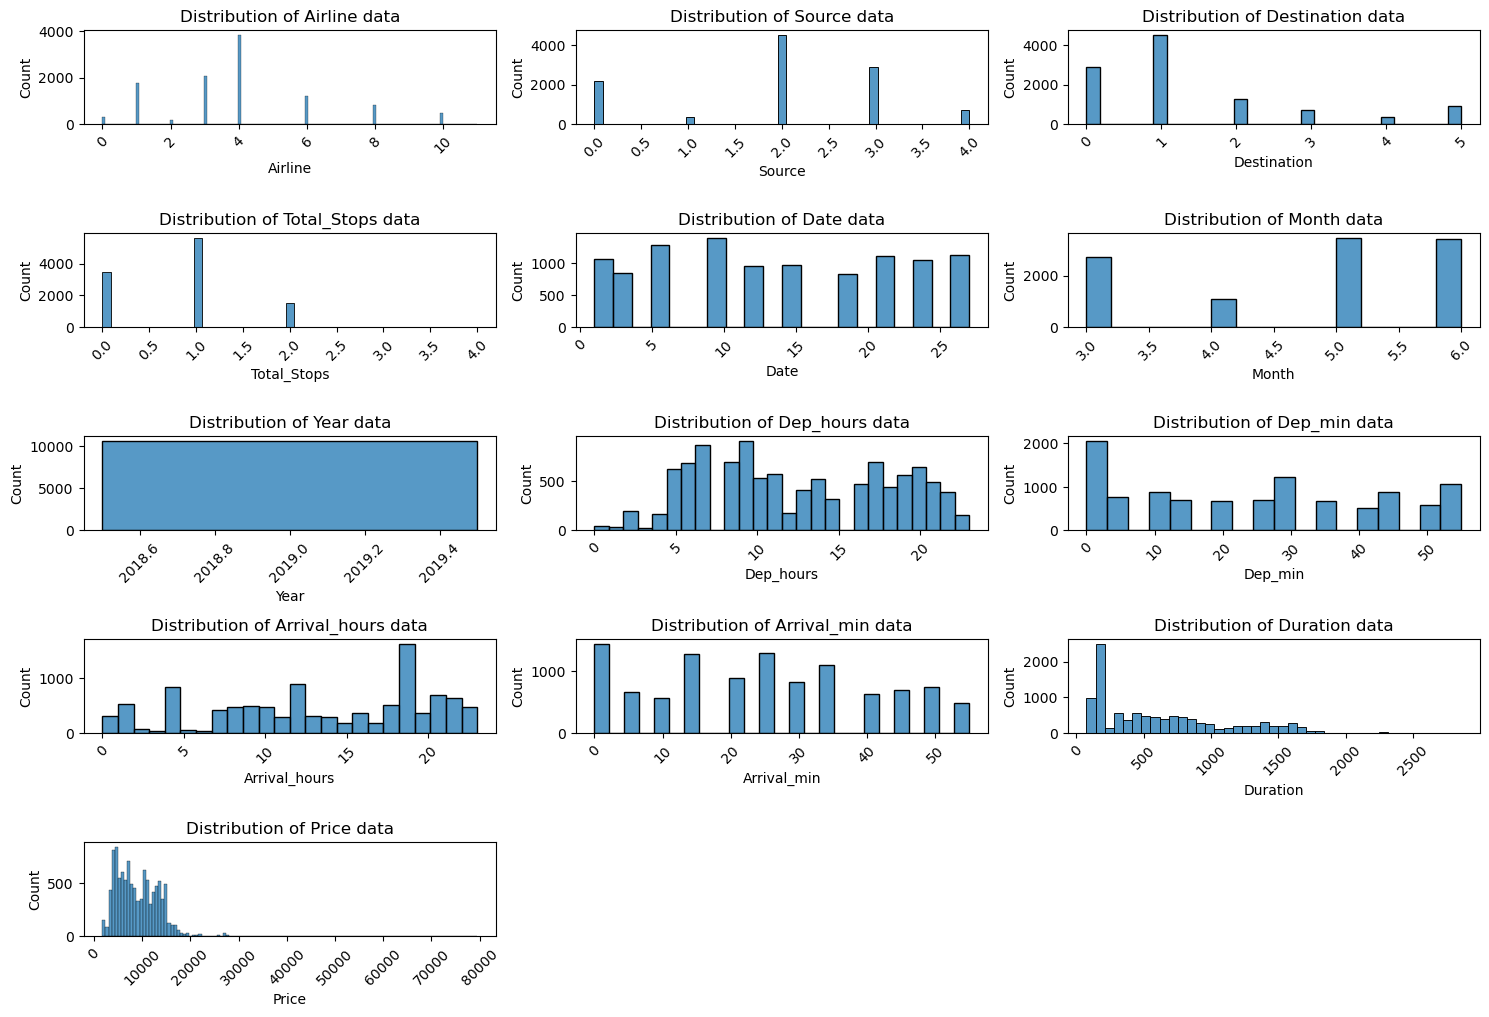

In [70]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(df.columns[:], 1):
    plt.subplot(5, 3, i)
    sns.histplot(x = df[col])
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.plot()

In [71]:
df_corr = df.corr()
df_corr["Price"].sort_values(ascending = False)

Price            1.000000
Total_Stops      0.603883
Duration         0.506495
Arrival_hours    0.024264
Source           0.015998
Dep_hours        0.006819
Dep_min         -0.024492
Airline         -0.039520
Destination     -0.071112
Arrival_min     -0.086155
Month           -0.103651
Date            -0.153738
Year                  NaN
Name: Price, dtype: float64

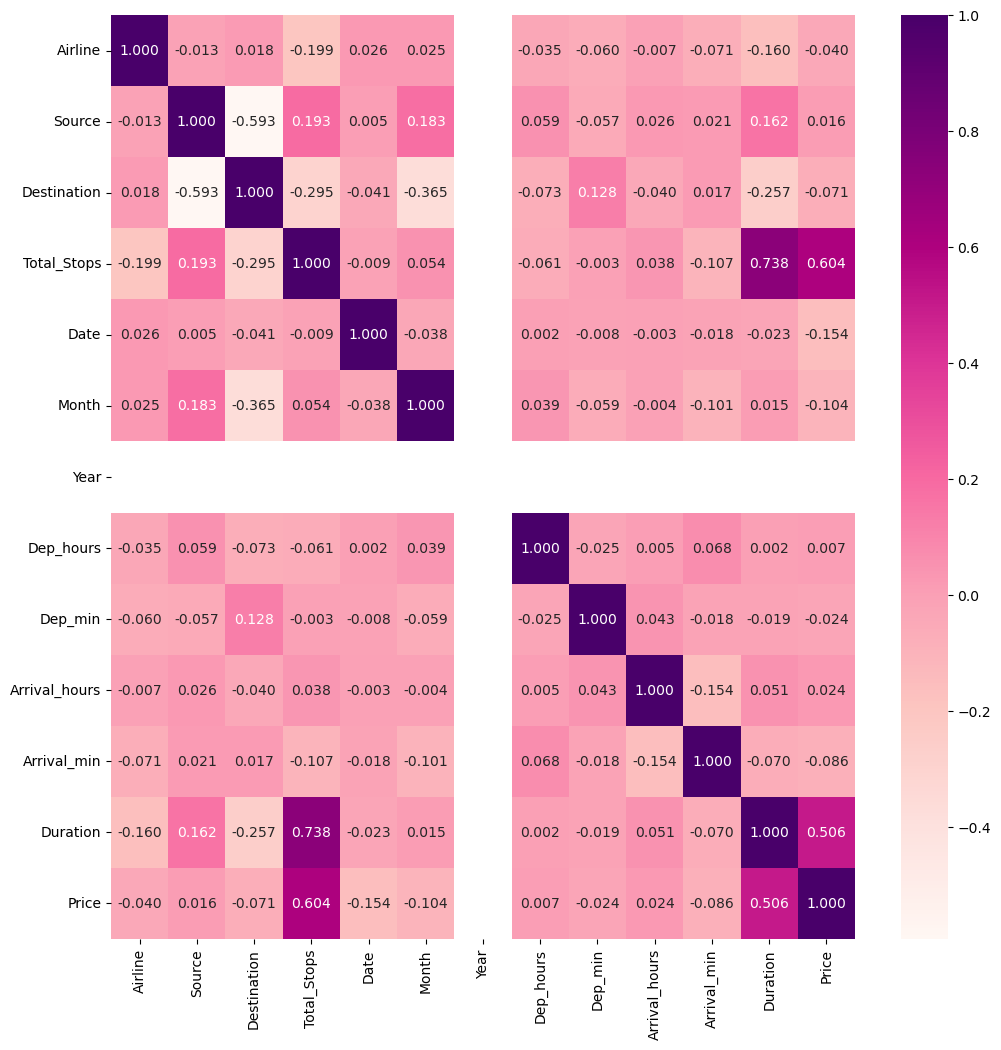

In [41]:
plt.figure(figsize = (12, 12))
sns.heatmap(df_corr, fmt = ".3f", annot = True, cmap = "RdPu")
plt.show()

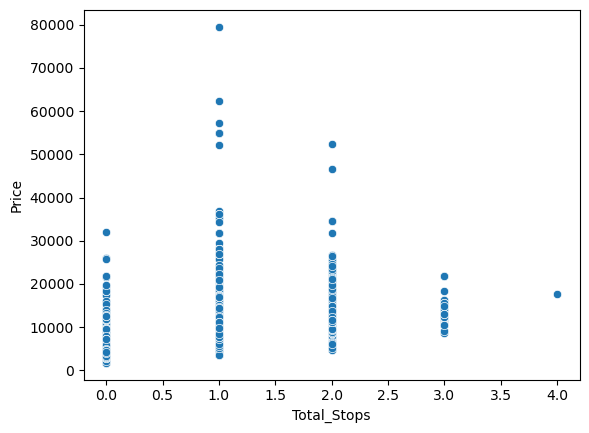

In [42]:
sns.scatterplot(x = df["Total_Stops"], y = df["Price"])
plt.show()

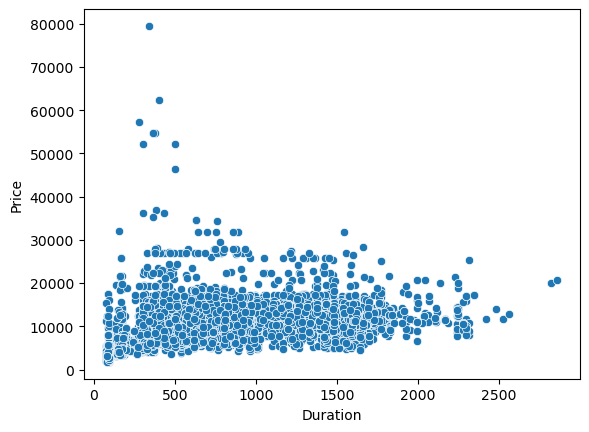

In [72]:
sns.scatterplot(x = df["Duration"], y = df["Price"])
plt.show()

In [73]:
df_0 = df[df["Total_Stops"] == 0]
df_1 = df[df["Total_Stops"] == 1]
df_2 = df[df["Total_Stops"] == 2]

In [74]:
print("Mean Price in zero transfer :", df_0["Price"].mean(), ", Mean flight time in zero transfer :", df_0["Duration"].mean())
print("Mean Price in one transfer :", df_1["Price"].mean(), ", Mean flight time in one transfer :", df_1["Duration"].mean())
print("Mean Price in two transfer :", df_2["Price"].mean(), ", Mean flight time in two transfer :", df_2["Duration"].mean())

Mean Price in zero transfer : 5024.900315095961 , Mean flight time in zero transfer : 150.08450300773418
Mean Price in one transfer : 10593.570031994312 , Mean flight time in one transfer : 782.0538570920726
Mean Price in two transfer : 12715.807894736841 , Mean flight time in two transfer : 1233.733552631579


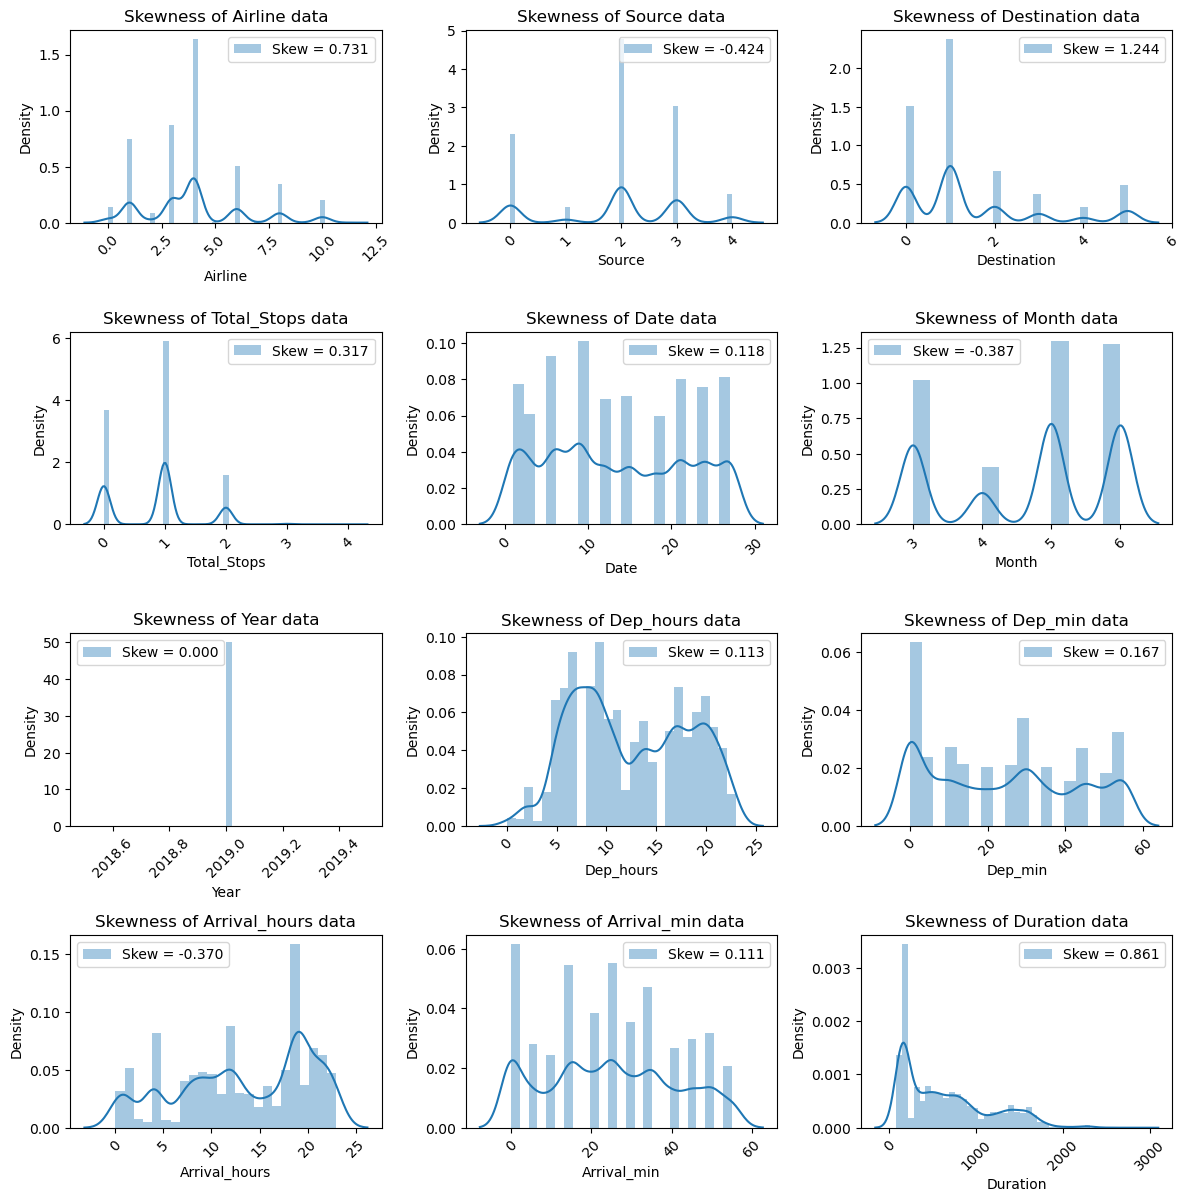

In [75]:
plt.figure(figsize = (12, 12))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 3, i)
    skewness = df[col].skew()
    sns.distplot(df[col],kde = True, label = "Skew = %.3f" %(skewness))
    plt.title(f"Skewness of {col} data")
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.legend(loc = "best")
    plt.plot()

In [76]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<Axes: >

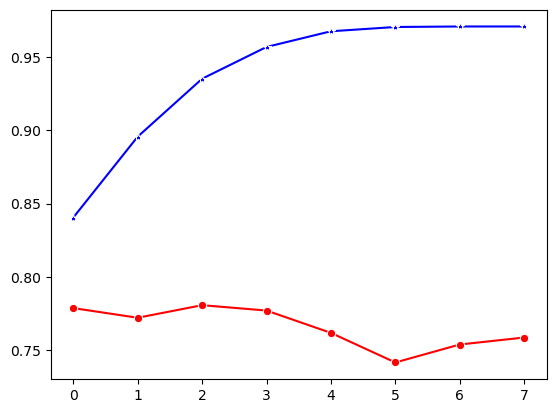

In [81]:
from xgboost.sklearn import XGBRegressor
train_scores = []
test_scores = []
for i in range(2, 10):
    xgbr = XGBRegressor(n_estimators = i*50, max_depth = i+1, max_features = i/10, min_child_weights = i+1)
    xgbr.fit(X_train, y_train)
    train_scores.append(xgbr.score(X_train, y_train))
    test_scores.append(xgbr.score(X_test, y_test))
sns.lineplot(train_scores, marker = '*', color = 'b')
sns.lineplot(test_scores, marker = 'o', color = 'r')

In [82]:
xgbr = XGBRegressor(n_estimators = 250, max_depth = 6, max_features = 0.5, min_child_weights = 6)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_features=0.5,
             max_leaves=None, min_child_weight=None, min_child_weights=6,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=250, n_jobs=None, ...)

In [83]:
y_pred = xgbr.predict(X_test)
y_pred

array([ 6304.9917,  3700.6375, 11380.942 , ..., 11994.71  , 11477.563 ,
        9384.517 ], dtype=float32)

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE Score :", mean_absolute_error(y_test, y_pred))
print("MSE Score :", mean_squared_error(y_test, y_pred))

MAE Score : 1230.0386521906623
MSE Score : 4719047.724293483
